In [1]:
%config IPCompleter.greedy=True

from os import path
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.6.0
False


In [3]:
import numpy as np
import torchvision
from PIL import Image

from matplotlib import pyplot as plt;
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from torch.utils.data import DataLoader

In [4]:
from utils import *
from models.models import FCNet, CNN
from attacks import fgsm, bim, llc

In [5]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [9]:
ds = FashionMNIST('./data', train=False, target_transform=None, download=True, transform=ToTensor())
for X, y in DataLoader(ds, 500, shuffle=True):
    X, y = X.to(device), y.to(device)
    break

In [10]:
print(len(ds))
img, label = ds[0]
print(img.shape)

10000
torch.Size([1, 28, 28])


In [11]:
classes = ds.classes
print(classes)
output_size = len(classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Label (numeric): 9
Label (textual): Ankle boot


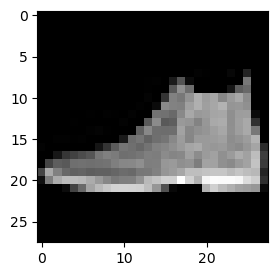

In [12]:
plt.figure(figsize=(3,3))
plt.imshow(img.squeeze(), cmap="gray")
print('Label (numeric):', label)
print('Label (textual):', classes[label])

In [13]:
fcnet = FCNet()
fcnet.load_state_dict(torch.load("models/fcnet.pt", map_location=device))

<All keys matched successfully>

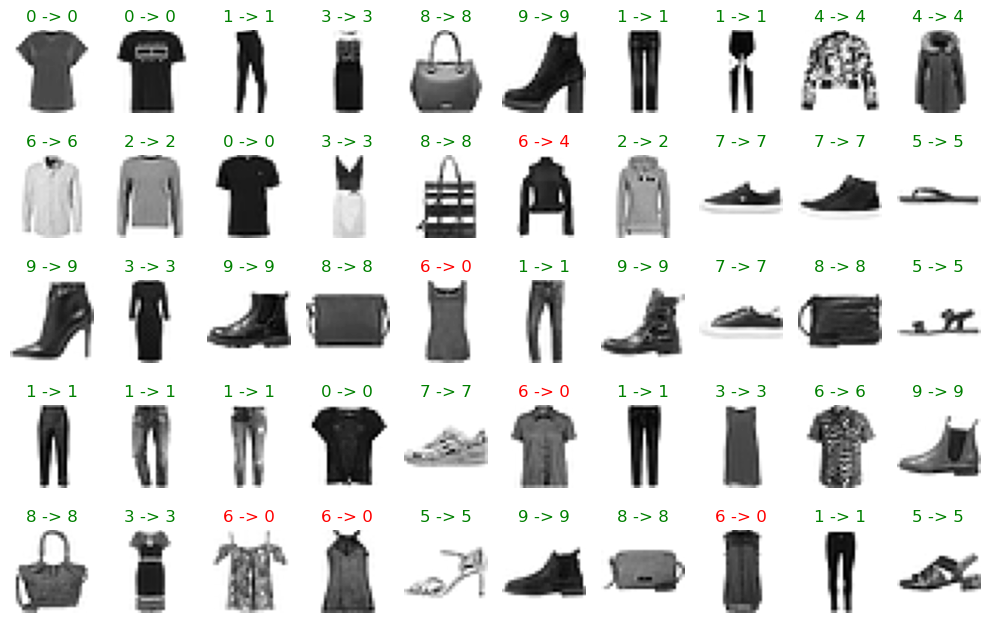

In [14]:
### Illustrate original predictions
yp = fcnet(X)
plot_images(X, y, yp, 5, 10)

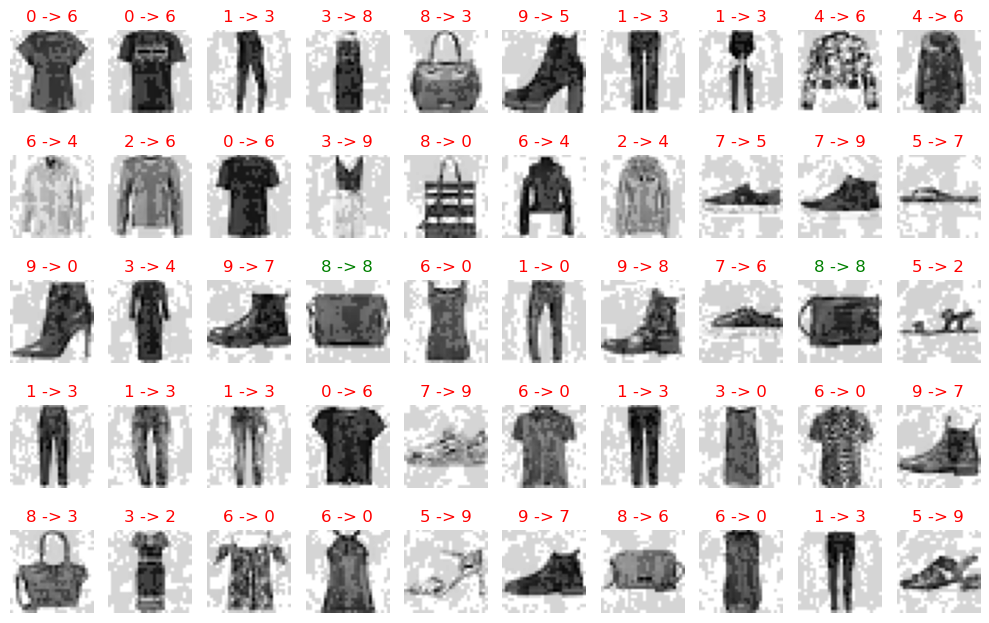

In [15]:
noise = fgsm(fcnet, nn.CrossEntropyLoss(), X, y, alpha=0.1)
yp = fcnet(X+noise)
plot_images(X+noise, y, yp, 5, 10)

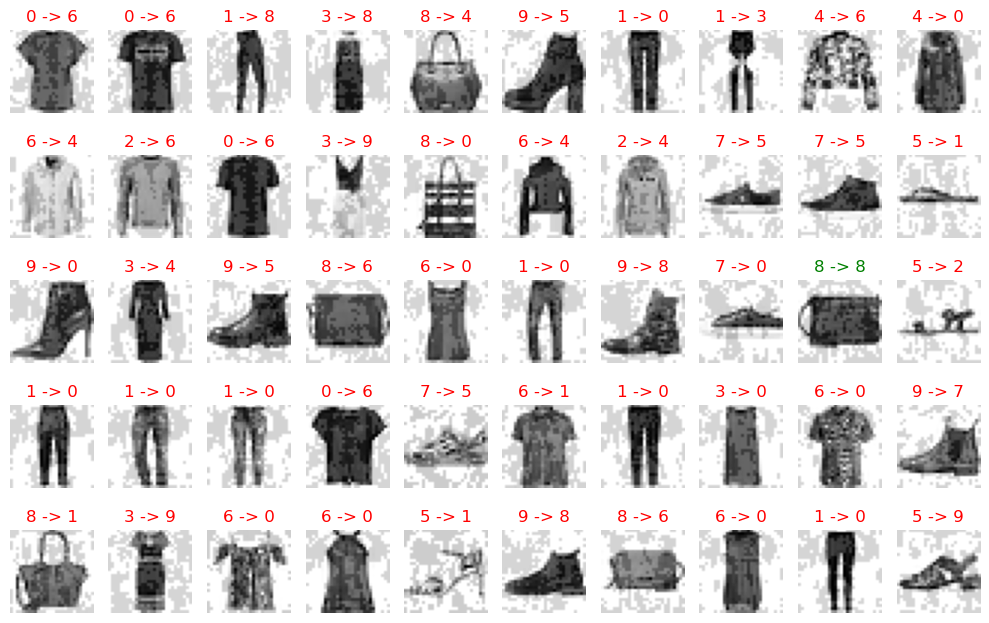

In [16]:
noise = bim(fcnet, nn.CrossEntropyLoss(), X, y, alpha=0.3, max_iter=3, clip_eps=8/255, do_clip=True)
yp = fcnet(X+noise)
plot_images(X+noise, y, yp, 5, 10)

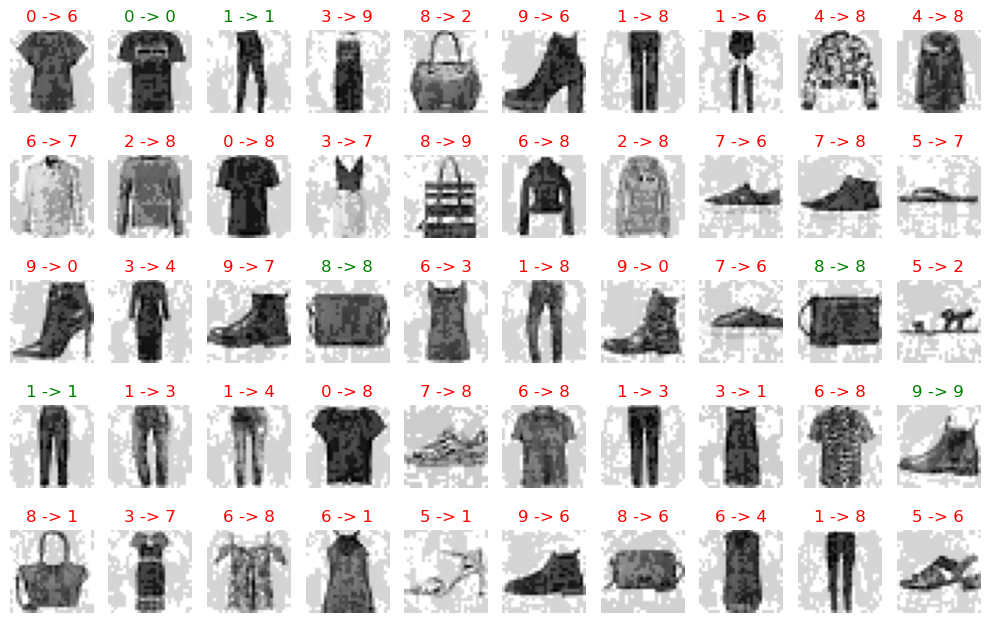

In [17]:
noise = llc(fcnet, nn.CrossEntropyLoss(), X, max_iter=3, alpha=0.3, clip_eps=8/255)
yp = fcnet(X+noise)
plot_images(X+noise, y, yp, 5, 10)

In [18]:
cnn = CNN()
cnn.load_state_dict(torch.load("models/cnn.pt", map_location=device))

<All keys matched successfully>

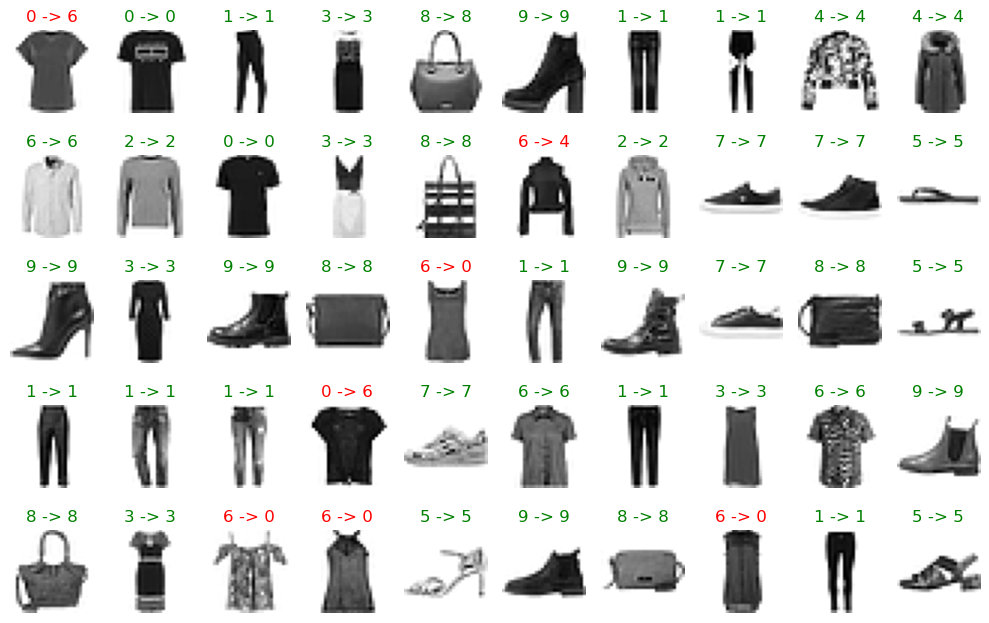

In [19]:
### Illustrate original predictions
yp = cnn(X)
plot_images(X, y, yp, 5, 10)

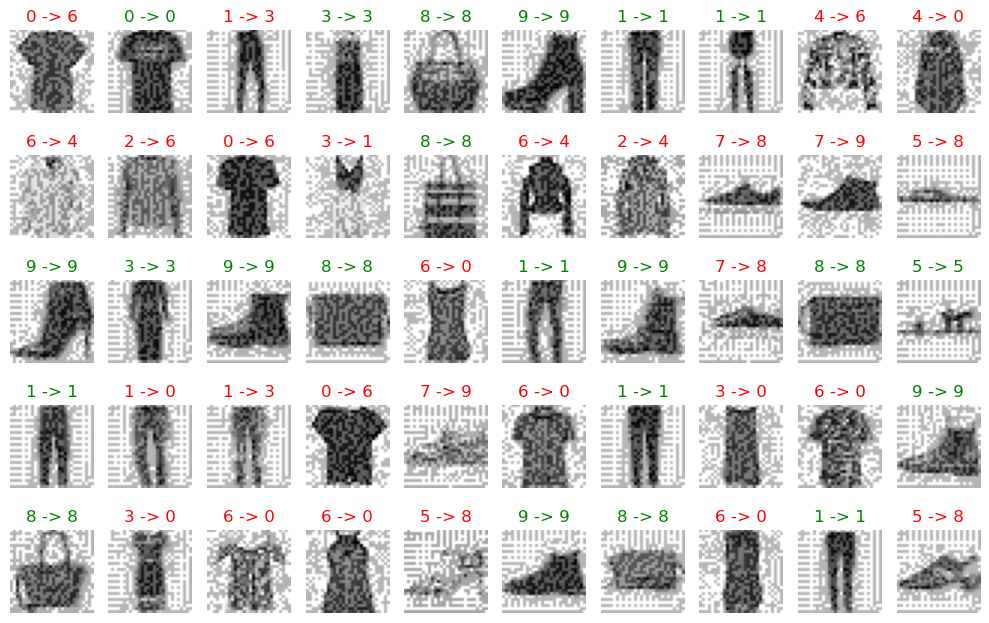

In [20]:
noise = fgsm(cnn, nn.CrossEntropyLoss(), X, y, alpha=0.2)
yp = cnn(X+noise)
plot_images(X+noise, y, yp, 5, 10)

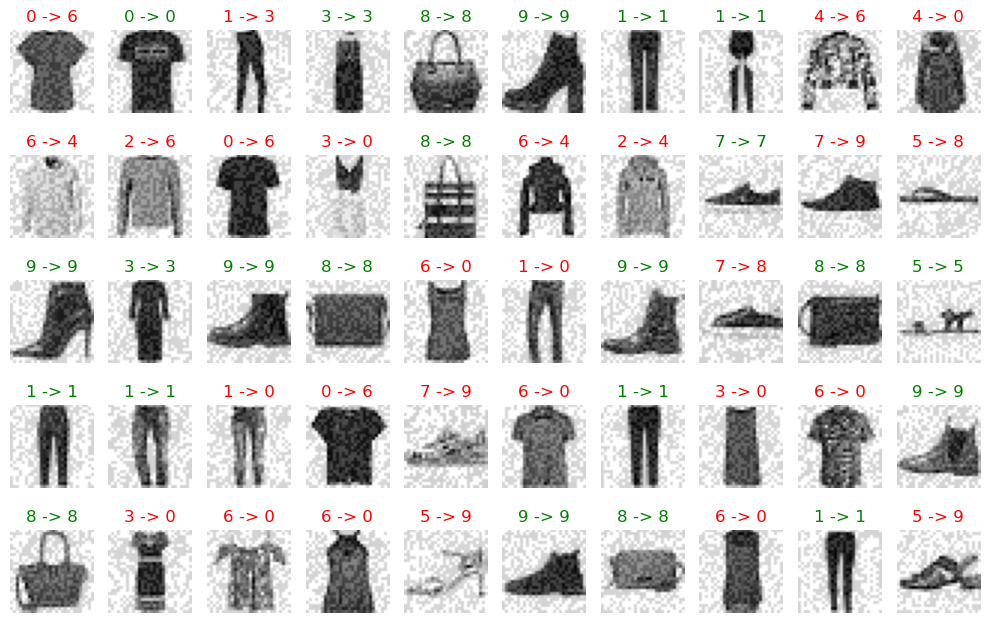

In [21]:
noise = bim(cnn, nn.CrossEntropyLoss(), X, y, alpha=0.3, max_iter=3, clip_eps=8/255, do_clip=True)
yp = cnn(X+noise)
plot_images(X+noise, y, yp, 5, 10)

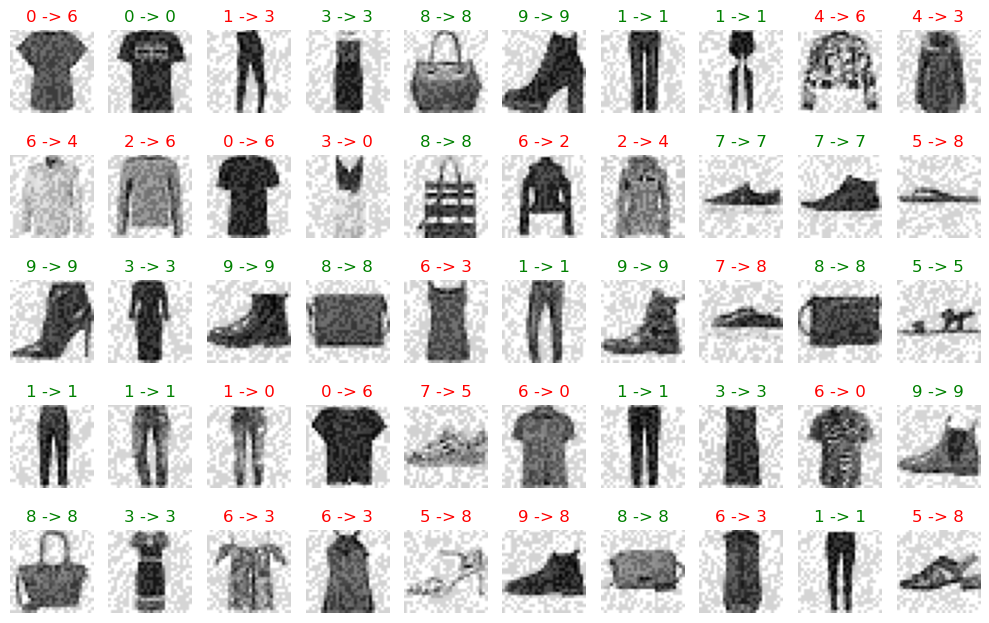

In [22]:
noise = llc(cnn, nn.CrossEntropyLoss(), X, max_iter=3, alpha=0.3, clip_eps=8/255, do_clip=True)
yp = cnn(X+noise)
plot_images(X+noise, y, yp, 5, 10)